In [2]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import ptitprince as pt
import nibabel as nb
import seaborn as sns
import matplotlib.colors as colors

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text
cm=1/2.54                           #to convert figsize inches into cm 
plt.rcParams['axes.linewidth'] = 0.8

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


## Decoding: CORE-MATRIX Framework 

cp difference map: positive values means calb > parv
medio-dorsal nucleus verbunden mit frontal, während lateral eher mit unimodal
medio dorsal mehr calb -> bin 1 mehr calb? trend from calb to parv over bins?

In [4]:

#load gradients and input structural connectivity matrix
gradients = np.load("/data/p_02666/Project1_thalamus/structural_connectivity/parcels_200/gradients_lh.npy")
gradient1=gradients[:,0]
gradient2=gradients[:,1]
gradient3=gradients[:,2]
cp_matrix= nb.load("/data/p_02666/Project1_thalamus/Atlas/CoreMatrix/calb_minus_pvalb.nii").get_fdata()

# import refined thalamus mask as reference
thala_ref_lh_path="/data/p_02666/mica-mics/thalamus_space_mni/space-MNI125_atlas-thalamus_lh_refined.nii.gz"
thala_ref_lh=nb.load(thala_ref_lh_path).get_fdata()
# collect indices of voxels where mask = 1 
idx_l=np.where(thala_ref_lh==1)
cp=cp_matrix[idx_l]         # value of parv_calb matrix
cp[cp==0]=np.nan            # if zero set to nan (mask is not completly fitting, take the intersection)

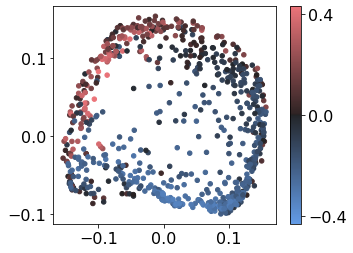

In [5]:
fig, ax=plt.subplots(1, figsize=(5,4))
#fig = sns.set_context("notebook", font_scale=1, rc={ 'font.family':'Arial'})
colormap_div=sns.diverging_palette(250, 10, l=63, center="dark", as_cmap=True)
norm=colors.TwoSlopeNorm(vmin=-0.43, vcenter=0, vmax=0.43)
fig = plt.scatter(gradient1, gradient2, c=cp, cmap=colormap_div, alpha=1, norm=norm,s=20)  #="PuOr" #icefire
#ax.set_xlabel("gradient 1", fontsize = 22, fontname="Arial", labelpad=8)
#ax.set_ylabel("gradient 2", fontsize = 22, fontname="Arial", labelpad=8)
ax.set_yticks([-0.1,0.0,0.1])
ax.tick_params(labelsize=16)
cbar=plt.colorbar()
cbar.set_ticks([-0.4,0.0,0.4])
cbar.ax.tick_params(labelsize=16)
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/core-matrix_distribution.svg", transparent=True, format='svg', dpi=600)

In [ ]:
###version where colorbar was ending with max and min but zero still centered
#fig, ax=plt.subplots(1, figsize=(5,4))
#fig = sns.set_context("notebook", font_scale=1, rc={ 'font.family':'Arial'})
#colormap_div=sns.diverging_palette(250, 10, l=63, center="dark", as_cmap=True)
#norm=colors.TwoSlopeNorm(vmin=-0.33, vcenter=0, vmax=0.43)
#fig = plt.scatter(gradient1, gradient2, c=cp, cmap=colormap_div, alpha=1, norm=norm,s=20)  #="PuOr" #icefire
#ax.set_yticks([-0.1,0.0,0.1])
#ax.tick_params(labelsize=16)
#cbar=plt.colorbar()
#cbar.set_ticks([-0.3,0.0,0.4])
#cbar.ax.tick_params(labelsize=16)
#plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/core-matrix_distribution.svg", transparent=True, format='svg', dpi=600)

## plot correlation

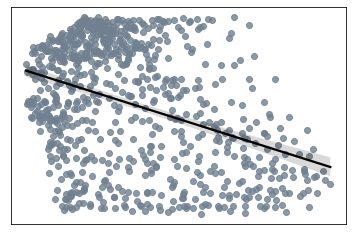

In [6]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["cp"]=cp
data["G1"]=gradient1
fig=sns.regplot(x="cp", y="G1", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_cp-g1.svg", transparent=True, format='svg', dpi=600)

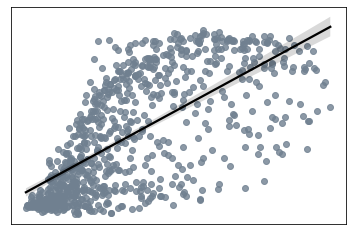

In [7]:
fig, ax=plt.subplots(1, figsize=(6,4))
data=pd.DataFrame()
data["cp"]=cp
data["G2"]=gradient2
fig=sns.regplot(x="cp", y="G2", data=data,
                scatter_kws={"color": "slategrey", 'alpha':0.8}, 
                line_kws={"color": "black"})
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("/data/p_02666/Project1_thalamus/plots/figure2/scatter_cp-g2.svg", transparent=True, format='svg', dpi=600)